# **Proyek Kedua**

Sistem Rekomendasi Buku

Nama: Zulfazazalia Putri Candra Wati

Email: lia.putricandrawati@gmail.com

Domisili: Bali


Install opendataset yang nantinya digunakan untuk mengambil dataset

In [1]:
!pip install opendatasets --upgrade


Impor opendataset yang digunakan untuk mengambil dataset yang ada pada kaggel dimana nantinya memasukkan username dan key

In [2]:
# Kunci Kaggle
# "username":"zulfaliaputri"
# "key":"202a7841f910c6335d48aae386e35185"

import opendatasets as od

dataset_url = 'https://www.kaggle.com/arashnic/book-recommendation-dataset'
od.download('https://www.kaggle.com/arashnic/book-recommendation-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zulfaliaputri
Your Kaggle Key: ··········


100%|██████████| 23.8M/23.8M [00:00<00:00, 99.7MB/s]


Library yang digunakan dalam proyek ini sebagai berikut:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
from pathlib import Path
import matplotlib.pyplot as plt

# **Data Understanding**

Deskripsi dari variable pada dataset:

> Books.csv
*   ISBN: merupakan id pada buku dengan tipe data object
* Book-Title: merupakan judul dari buku dengan tipe data object
*   Book-Author: merupakan pengarang dari buku dengan tipe data object
* Year-Of-Publication: merupakan tahun di publikasinya buku dengan tipe data object
* Publisher: merupakan penerbit dari buku dengan tipe data object
* Image-URL-S: merupakan sampul gambar dari buku yang berukuran kecil dengan tipe data object
* Image-URL-M: merupakan sampul gambar dari buku yang berukuran sedang dengan tipe data object
* Image-URL-L: merupakan sampul gambar dari buku yang berukuran besar dengan tipe data object



> Rating.csv
* User-ID: merupakan ID dari user dengan tipe data int64
* ISBN: merupakan id pada buku dengan tipe data object
* Book-Rating: merupakan rating yang diberikan untuk buku dengan tipe data int64



Load dataset 

In [4]:
import pandas as pd
books = pd.read_csv('/content/book-recommendation-dataset/Books.csv')
rating = pd.read_csv('/content/book-recommendation-dataset/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Univariate Exploratory Data Analysis

Menampilkan data yang ada pada dataset books setelah dilakukan load dataset

In [5]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Menampilkan info dari dataset 'books' yang bernilai object

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
len(books)

271360

Mengambil data buku yang digunakan sebanyak 12000 dari data yang berjumlah 271360 dengan menggunakan fungsi *iloc*

In [8]:
data_books = books.iloc[:12000]
len(data_books)

12000

Menampilkan data yang ada pada dataset rating setelah dilakukan load dataset

In [9]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Menampilkan info dari dataset 'rating' yang bernilai integer dan object

In [10]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
len(rating)

1149780

Mengambil data rating yang digunakan sebanyak 12000 dari data yang berjumlah 1149780 dengan menggunakan fungsi *iloc*

In [12]:
data_rating = rating.iloc[:12000]
len(data_rating)

12000

Melakukan *rename* kolom pada data_books yang digunakan untuk memudahkan menuliskan kolom

In [13]:
data_books.rename(columns = {'Book-Title':'Book_Title', 'Book-Author': 'Book_Author', 'Year-Of-Publication': 'Year_Publication'},inplace = True)
data_books

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ISBN,Book_Title,Book_Author,Year_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
11995,0030291798,Business Marketing Management: A Strategic Vie...,Michael D. Hutt,2000,South-Western College Pub,http://images.amazon.com/images/P/0030291798.0...,http://images.amazon.com/images/P/0030291798.0...,http://images.amazon.com/images/P/0030291798.0...
11996,0060959541,From This Day Forward,Cokie Roberts,2001,Perennial,http://images.amazon.com/images/P/0060959541.0...,http://images.amazon.com/images/P/0060959541.0...,http://images.amazon.com/images/P/0060959541.0...
11997,0812967224,The Day I Turned Uncool: Confessions of a Relu...,Dan Zevin,2002,Villard Books,http://images.amazon.com/images/P/0812967224.0...,http://images.amazon.com/images/P/0812967224.0...,http://images.amazon.com/images/P/0812967224.0...
11998,0374250995,Rivonia's Children: Three Families and the Cos...,Glenn Frankel,1999,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0374250995.0...,http://images.amazon.com/images/P/0374250995.0...,http://images.amazon.com/images/P/0374250995.0...


Melakukan *rename* kolom pada data_rating yang digunakan untuk memudahkan menuliskan kolom

In [14]:
data_rating.rename(columns = {'User-ID':'UserID', 'Book-Rating': 'Book_Rating'},inplace = True)
data_rating

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,UserID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
11995,929,067163884X,7
11996,929,0671667815,0
11997,929,067168390X,0
11998,929,0671868691,0


In [15]:
print('Jumlah Buku berdasarkan Rating: ', len(data_rating.ISBN.unique()))
print('Jumlah Buku berdasarkan Daftar Buku: ', len(data_books.ISBN.unique()))

Jumlah Buku berdasarkan Rating:  10945
Jumlah Buku berdasarkan Daftar Buku:  12000


Melakukan drop kolom pada 'data_books' dikarenakan kolom tersebut tidak digunakan pada proses

In [16]:
data_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L' ], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Mengubah kolom 'Year_Publication' yang awalnya bertipe data object menjadi integer

In [17]:
data_books['Year_Publication'] = pd.to_numeric(data_books['Year_Publication'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISBN              12000 non-null  object
 1   Book_Title        12000 non-null  object
 2   Book_Author       12000 non-null  object
 3   Year_Publication  12000 non-null  int64 
 4   Publisher         12000 non-null  object
dtypes: int64(1), object(4)
memory usage: 468.9+ KB


Menggabungkan 'data_books' dan 'data_rating' dengan menggunakan fungsi *merge*

In [19]:
data_train = data_rating.merge(data_books, left_on = 'ISBN', right_on = 'ISBN')

In [20]:
data_train

,UserID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
2,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
...,...,...,...,...,...,...,...
3336,929,0553801031,9,The New Rabbi : A Congregation Searches for It...,STEPHEN FRIED,2002,Bantam
3337,929,0590457225,0,Dealing With Dragons (Enchanted Forest Chronic...,Patricia C. Wrede,1992,Scholastic
3338,929,067163884X,7,THIS HALLOWED GRND,Bruce Catton,1986,Pocket
3339,929,067168390X,0,Lonesome Dove,Larry McMurtry,1988,Pocket


In [21]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3341 entries, 0 to 3340
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UserID            3341 non-null   int64 
 1   ISBN              3341 non-null   object
 2   Book_Rating       3341 non-null   int64 
 3   Book_Title        3341 non-null   object
 4   Book_Author       3341 non-null   object
 5   Year_Publication  3341 non-null   int64 
 6   Publisher         3341 non-null   object
dtypes: int64(3), object(4)
memory usage: 208.8+ KB


Menampilkan deskripsi yang digunakan untuk memberikan informasi statistik pada kolom 'Year_Publication'

In [22]:
data_train['Year_Publication'].describe()

count    3341.000000
mean     1973.237953
std       211.802754
min         0.000000
25%      1993.000000
50%      1998.000000
75%      2001.000000
max      2004.000000
Name: Year_Publication, dtype: float64

Menampilkan kolom 'Year_Publication' dengan menggunakan *barplot* dimana data tahun yang ditampilkan dari range 0-9

In [23]:
year=data_train['Year_Publication'].value_counts()[0:10]

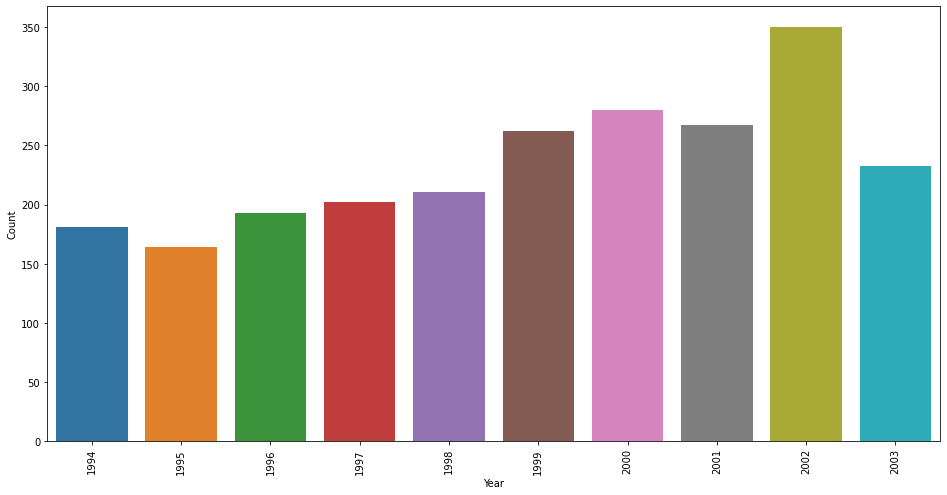

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(x=year.index,y=year)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Bila dilihat dari gambar diatas maka tahun 2002 memiliki jumlah tahun terbanyak dalam publikasi dibandingkan dari tahun yang lainnya

Selanjutnya, menampilkan 10 penulis terpopuler berasal dari kolom 'Book_Author' dimana menggunakan *barplot* untuk menampilkan gambar. Bila dilihat dari gambar dibawah ini penulis terpopuler dengan peringkat pertama yitu 'James patterson'. Namun bila di lihat dengan seksama penulis peringkat ketiga dan keempat memiliki jumlah yang sedikit berbeda.

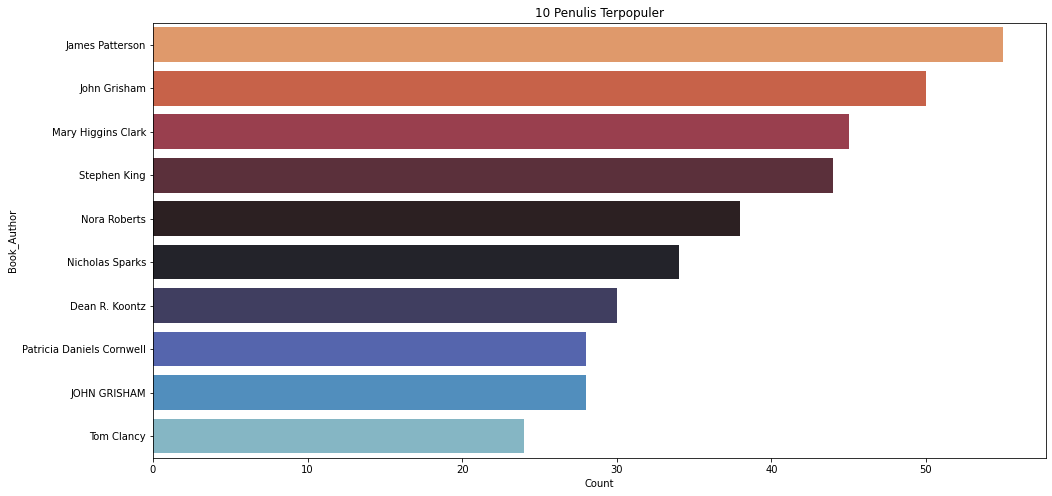

In [25]:
most_author = data_train.Book_Author.value_counts().reset_index()
most_author.columns = ['Book_Author','count']

plt.figure(figsize = (16,8))
plt.title("10 Penulis Terpopuler")
sns.barplot(x = 'count', y = 'Book_Author', data = most_author.head(10), palette='icefire_r');
plt.ylabel('Book_Author')
plt.xlabel('Count')
plt.show()

Kemudian, menampilkan 10 publisher teratas berasal dari kolom 'Publisher' dimana menggunakan *barplot* untuk menampilkan gambar. Bila dilihat dari gambar diatas maka publisher yang berada di peringkat atas yaitu “Ballantine Books” dengan jumlah yang lebih banyak dibandingkan dengan publisher yang lain. Namun bila dilihat kembali pada peringkat sembilan dan sepuluh memiliki jumlah yang sama.

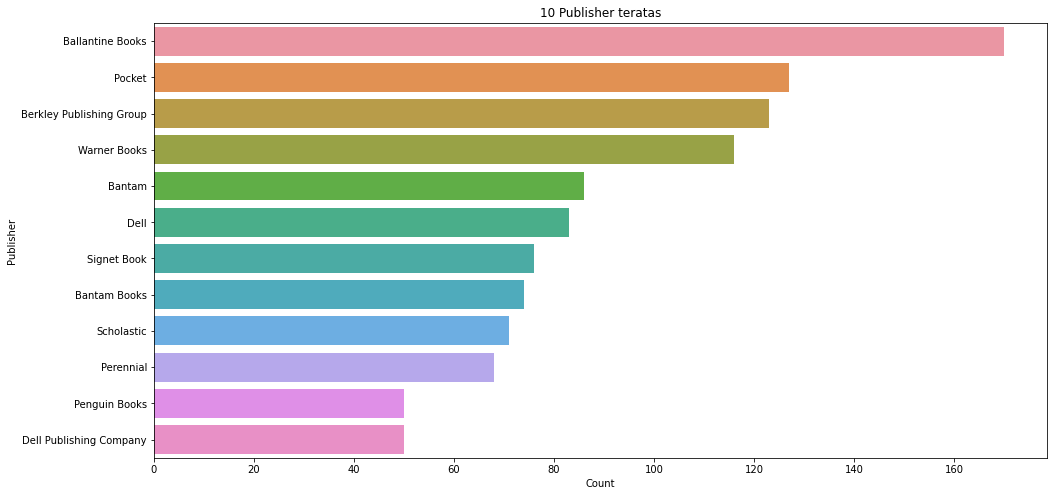

In [26]:
most_publis = data_train.Publisher.value_counts().reset_index()
most_publis.columns = ['Publisher','count']

plt.figure(figsize = (16,8))
plt.title("10 Publisher teratas")
sns.barplot(x = 'count', y = 'Publisher', data = most_publis.head(12));
plt.ylabel('Publisher')
plt.xlabel('Count')
plt.show()

Menampilkan 'Rata-rata rating dengan buku terbanyak dibaca' dimana berasal dari kolom 'Book_Title' dan 'Book_Rating' yang menggunakan *barplot* untuk menampilkan gambar. Pada gambar dibawah terlihat bahwa buku dengan judul “A Painted House” memiliki rating terbanyak dari pengguna dibandingkan buku yang lainnya.

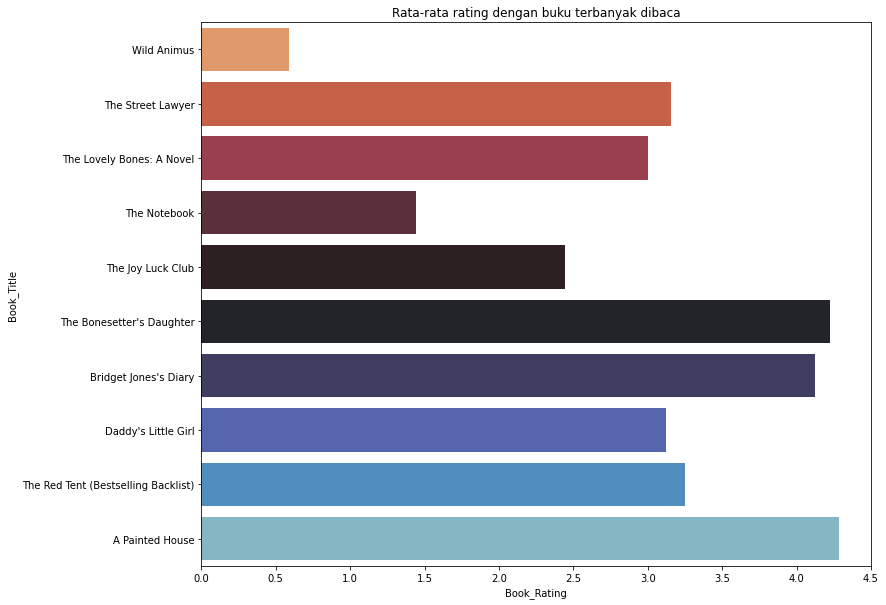

In [27]:
data_aver = data_train.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
temp = data_train.Book_Title.value_counts().reset_index()
temp.columns = ['Book_Title','count']
most_rated_by_reads = pd.merge(data_aver,temp,on='Book_Title')

most_rated_by_reads = most_rated_by_reads.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Rata-rata rating dengan buku terbanyak dibaca")
sns.barplot(x = 'Book_Rating', y = 'Book_Title', data = most_rated_by_reads.head(10), palette='icefire_r');

# **Data Preparation**

Pada tahap ini menggunakan beberapa teknik dengan penjelasan sebagai berikut:

Mengecek data pada data_books, data_rating dan gabungan dari dua data tersebut yaitu data_train dimana terdapat data null atau tidak yang menggunakan fungsi *isnull*

In [28]:
data_books.isnull().sum()

ISBN                0
Book_Title          0
Book_Author         0
Year_Publication    0
Publisher           0
dtype: int64

In [29]:
data_rating.isnull().sum()

UserID         0
ISBN           0
Book_Rating    0
dtype: int64

In [30]:
data_train.isnull().sum()

UserID              0
ISBN                0
Book_Rating         0
Book_Title          0
Book_Author         0
Year_Publication    0
Publisher           0
dtype: int64

Dilakukan persiapan penghapusan data duplikat, dengan membuat variable baru dengan nama ‘data_prep’ yang berisi dataframe ‘data_train’ yang diurutkan berdasarkan ‘ISBN’

In [31]:
data_prep = data_train
data_prep.sort_values('ISBN')

,UserID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Publication,Publisher
2126,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2245,190,0002740230,7,Keep It Simple: And Get More Out of Life,Nick Page,1999,Trafalgar Square
3279,901,0006276199,0,Alien at St Wilfred's,Adrian Plass,1999,Zondervan
3280,901,000649840X,9,Angelas Ashes,Frank Mccourt,0,Harpercollins Uk
2878,643,0007100221,7,TERROR FIRMA,Matthew Thomas,2001,Trafalgar Square
...,...,...,...,...,...,...,...
908,277509,9724115380,9,A hora de SertÃ³rio (Finisterra),JoÃ£o Aguiar,1994,EdiÃ§Ãµes ASA
2228,160,9724119378,0,O Deus Das Pequenas Coisas,Roy,1998,Edicoes Asa
524,277272,9726101794,4,As mulheres deviam vir com livro de instruÃ§Ãµ...,Manuel Jorge Marmelo,1999,Campo das Letras
177,276925,9871138016,0,Cronica De Una Muerte Anunciada,Gabriel Marques Garcia,2002,Debols!llo


Setelah dilakukan persiapan dilanjutkan dengan penghapusan data duplikat menggunakan fungsi *drop_duplicates*. Penghapusan data duplikat berguna bila data train dan data test ada yang sama. Bila di lihat dari gambar diatas dan di bawah jumlah rows berkurang ketika dilakukan penghapusan data duplikat

In [32]:
data_prep = data_prep.drop_duplicates('ISBN')
data_prep

,UserID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
6,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group
8,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books
...,...,...,...,...,...,...,...
3336,929,0553801031,9,The New Rabbi : A Congregation Searches for It...,STEPHEN FRIED,2002,Bantam
3337,929,0590457225,0,Dealing With Dragons (Enchanted Forest Chronic...,Patricia C. Wrede,1992,Scholastic
3338,929,067163884X,7,THIS HALLOWED GRND,Bruce Catton,1986,Pocket
3339,929,067168390X,0,Lonesome Dove,Larry McMurtry,1988,Pocket


Pada gambar diatas dilakukan proses pengkonversian data series dalam bentuk list. Pada proses menggunakan fungsi ‘tolist()’ dari library numpy. Yang kemudian menampilkan jumlah dari books_id, books_title dan books_author.

In [33]:
# Mengonversi data series 'ISBN’ menjadi dalam bentuk list
books_id = data_prep['ISBN'].tolist()
 
# Mengonversi data series ‘Title’ menjadi dalam bentuk list
books_title = data_prep['Book_Title'].tolist()
 
# Mengonversi data series ‘Author’ menjadi dalam bentuk list
books_author = data_prep['Book_Author'].tolist()
 
print(len(books_id))
print(len(books_title))
print(len(books_author))

2519
2519
2519


Tahap berikutnya, membuat dictionary yang gunanya untuk menentukan pasangan key-value dari data books_id, books_title dan books_author

In [34]:
# Membuat dictionary untuk data ‘books_id’, ‘books_title’, dan ‘books_author’
books_new = pd.DataFrame({
    'id': books_id,
    'title':books_title,
    'author': books_author
})
books_new

,id,title,author
0,034545104X,Flesh Tones: A Novel,M. J. Rose
1,0446520802,The Notebook,Nicholas Sparks
2,038550120X,A Painted House,JOHN GRISHAM
3,0425115801,Lightning,Dean R. Koontz
4,0449006522,Manhattan Hunt Club,JOHN SAUL
...,...,...,...
2514,0553801031,The New Rabbi : A Congregation Searches for It...,STEPHEN FRIED
2515,0590457225,Dealing With Dragons (Enchanted Forest Chronic...,Patricia C. Wrede
2516,067163884X,THIS HALLOWED GRND,Bruce Catton
2517,067168390X,Lonesome Dove,Larry McMurtry


Kemudian, untuk memudahkan mengingat nama rating sehingga untuk variable 'data_rating' diubah menjadi 'df' sehingga ketika membaca dataset untuk rating menggunakan variable 'df'

In [35]:
df = data_rating
df

,UserID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
11995,929,067163884X,7
11996,929,0671667815,0
11997,929,067168390X,0
11998,929,0671868691,0


Setelah melakukan proses diatas maka masuk ke proses encoding data. Dimana pada proses ini digunakan untuk menyandikan (encode) fitur ke dalam indeks integer dimana fitur yang digunakan yaitu fitur ‘UserID’ dan ‘ISBN’.


In [36]:
# Mengubah UserID menjadi list tanpa nilai yang sama
user_ids = df['UserID'].unique().tolist()
print('list UserID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded UserID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke UserID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke UserID: ', user_encoded_to_user)

list UserID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

Pada output diatas menampilkan encode fitur ‘UserID’ dimana terdiri dari list UserID, encoded UserId dan encoded angka ke UserID.

Untuk proses encoding fitur ISBN sama seperti proses encoding fitur UserID yang dilanjutkan dengan memetakan userID dan ISBN ke dataframe yang berkaitan seperti userID ke dataframe user dan ISBN ke dataframe book.

In [37]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = df['ISBN'].unique().tolist()
 
# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
 
# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
 
#Selanjutnya, petakan userID dan ISBN ke dataframe yang berkaitan.
 
# Mapping userID ke dataframe user
df['user'] = df['UserID'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe book
df['book'] = df['ISBN'].map(book_to_book_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Tahap terakhir yaitu melakukan pengecekan data seperti jumlah user, jumlah book dan mengubah nilai rating yang awalnya memiliki tipe data integer menjadi float.

In [38]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah book
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
df['Book_Rating'] = df['Book_Rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Book_Rating'])
 
# Nilai maksimal rating
max_rating = max(df['Book_Rating'])
 
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

1164
10945
Number of User: 1164, Number of Resto: 10945, Min Rating: 0.0, Max Rating: 10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Pada output diatas ditampilkan jumlah user, jumlah book, minimum rating dan maksimal rating.

Untuk tahap ini dilakukan pengacakan dataset agar distribusi yang dilakukan menjadi random

In [39]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,UserID,ISBN,Book_Rating,user,book
1935,277427,156865037X,7.0,255,1881
6494,278418,0446360406,0.0,678,6118
1720,277427,0553297422,0.0,255,1676
9120,278582,0140277471,9.0,749,8616
360,276875,883041915X,0.0,65,356
...,...,...,...,...,...
11964,929,0345331605,7.0,1163,10917
5191,278418,0373074050,0.0,678,4870
5390,278418,0373121962,0.0,678,5066
860,277087,8472230082,5.0,139,850


Selanjutnya, membagi data train dan validasi dengan komposisi 90:20. Namun sebelumnya, kita perlu memetakan (mapping) data user dan book menjadi satu value terlebih dahulu. Kemudian, membuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [40]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book_Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 90% data train dan 20% data validasi
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 255 1881]
 [ 678 6118]
 [ 255 1676]
 ...
 [ 678 5066]
 [ 139  850]
 [ 678 6857]] [0.7 0.  0.  ... 0.  0.5 0. ]


# **Modelling**

Pada tahap ini saya menggunakan model collaborative filtering dimana menggunakan metode deep learning yang bertujuan menghasilkan rekomendasi buku.

Tahap awal yang dilakukan yaitu melakukan proses embedding terhadap data user dan book. Lalu dilanjutkan dengan operasi perkalian dot product antara embedding user dan book serta menambahkan bias untuk kedua data. Skor kecocokan di tetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Langkah selanjutnya dengan melakukan proses compile terhadap model yang terdiri dari loss function yang menggunakan Binary Crossentropy, optimizer yang menggunakan Adam (Adaptive Moment Estimation) dan untuk metrics evaluation yaitu root mean squared error (RMSE)

In [42]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Melakukan proses training

In [43]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
1350/1350 [==============================] - 11s 7ms/step - loss: 0.5995 - root_mean_squared_error: 0.3994 - val_loss: 0.5190 - val_root_mean_squared_error: 0.3546
Epoch 2/20
1350/1350 [==============================] - 10s 8ms/step - loss: 0.4390 - root_mean_squared_error: 0.3117 - val_loss: 0.4719 - val_root_mean_squared_error: 0.3292
Epoch 3/20
1350/1350 [==============================] - 10s 8ms/step - loss: 0.4114 - root_mean_squared_error: 0.2962 - val_loss: 0.4366 - val_root_mean_squared_error: 0.3129
Epoch 4/20
1350/1350 [==============================] - 10s 8ms/step - loss: 0.3891 - root_mean_squared_error: 0.2834 - val_loss: 0.4155 - val_root_mean_squared_error: 0.3044
Epoch 5/20
1350/1350 [==============================] - 10s 7ms/step - loss: 0.3725 - root_mean_squared_error: 0.2731 - val_loss: 0.4033 - val_root_mean_squared_error: 0.2993
Epoch 6/20
1350/1350 [==============================] - 10s 7ms/step - loss: 0.3600 - root_mean_squared_error: 0.2644 - val_l

Tahap akhir yaitu dengan mengambil sampel user secara acak dan definisikan variabel book_not_visited yang merupakan daftar book yang belum pernah dikunjungi oleh pengguna. Variabel book_not_visited diperoleh dengan menggunakan operator bitwise (~) pada variabel book_visited_by_user.

In [44]:
book_df = books_new
 
# Mengambil sample user
user_id = df.UserID.sample(1).iloc[0]
book_visited_by_user = df[df.UserID == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_not_visited = book_df[~book_df['id'].isin(book_visited_by_user.ISBN.values)]['id'] 
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

Dalam memperoleh rekomendasi buku maka menggunakan fungsi *model.predict()* dari library Keras.

In [45]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Menampilkan Rekomendasi Untuk Pengguna: {}'.format(user_id))
print('===' * 9)
print('Buku dengan peringkat tinggi dari pengguna')
print('----' * 8)
 
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'Book_Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.author)
 
print('----' * 8)
print('10 Rekomendasi Buku Teratas')
print('----' * 8)
 
recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.title, ':', row.author)

Menampilkan Rekomendasi Untuk Pengguna: 278418
Buku dengan peringkat tinggi dari pengguna
--------------------------------
--------------------------------
10 Rekomendasi Buku Teratas
--------------------------------
The King of Torts : JOHN GRISHAM
She's Come Undone (Oprah's Book Club) : Wally Lamb
The Secret Life of Bees : Sue Monk Kidd
Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper)) : Jack Canfield
Sleep No More : Greg Iles
Rebecca : Daphne Du Maurier
Chasing the Dime : Michael Connelly
McDonald's: Behind the Arches : John F. Love
The Breach : Brian Kaufman
Name of the Rose : Umberto Eco


Pada output diatas merupakan hasil rekomendasi dari model collaborative filtering dimana user dengan id 508. Kita dapat melihat bahwa terdapat dua perbandingan yaitu Buku dengan peringkat tinggi dari pengguna yaitu ‘Echoes : Maeve Binchy’ dan ‘Kissing in Manhattan : DAVID SCHICKLER’ Serta 10 Rekomendasi Buku Teratas yang salah satunya yaitu ‘The Watsons Go to Birmingham - 1963 (Yearling Newbery) : CHRISTOPHER PAUL CURTIS’.

# **Evaluation**

Pada tahap ini saya menggunakan metrik root mean squared error (RMSE) dimana metode estimasi yang mempunyai Root Mean Square Error (RMSE) lebih kecil dikatakan lebih akurat daripada metode estimasi yang mempunyai Root Mean Square Error (RMSE) lebih besar. 



Pada gambar dibawah ini merupakan hasil visualisasi metrik RMSE dari proses training yang menggunakan matplotlib. Dimana menampilkan plot *root_mean_squared_error* dan *val_root_mean_squared_error*

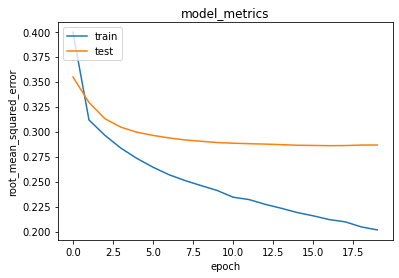

In [46]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Kesimpulan**

Dari proses yang telah dilakukan didapatkan hasil perbandingan buku dengan peringkat tinggi dari pengguna dan 10 Rekomendasi Buku Teratas. Pada proyek ini saya menggunakan model Colaborative Filtering dimana menggunakan metrik Root Mean Square Error (RMSE). Serta untuk model ini data yang diperlukan dalam membuat rekomendasi yaitu data rating dari pengguna. Kemudian, dikarenakan data yang terlalu banyak sehingga saya menggunakan beberapa data total dari data yang ada 12.000 data Books dan 12.000 data Rating.